# COGS 118A- Project Proposal

# Team

- Xiaoxuan Zhang
- Yunxiang Chi
- Xiaoyan He
- Jiayi Dong
- Elaine (Yilin) Ge

# Abstract 

The project is designed to be a **Music Genre Classification Tool**.

Our study aims to develop an advanced music genre classification system with the objective of enhancing personalized recommendation mechanisms and user experience. The comprehensive classification model is capable of accommodating a wide spectrum of music genres, such as rock, pop, jazz, hip-hop, and electronic, among others. The dataset comprises audio recordings of songs, evaluated through an array of attributes such as spectral information, rhythmic patterns, and harmonic characteristics, along with mean and variance of multiple features in CSV files. These extracted features serve as input for our machine learning models. Employing algorithms like K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Neural Networks, the research exploits a heterogeneous dataset of labeled music samples spanning various genres. The efficacy of the proposed music genre classification system is gauged through numerous evaluation metrics, including accuracy, precision, recall, F1 score, and confusion matrix. These quantitative assessments shed light on the models' classification performance and their capability to accurately predict music genres, enabling the selection of the most efficient model. By demonstrating high accuracy and robustness, our tool exhibits its effectiveness and dependability, promising significant improvements in music recommendation systems.

# Background

Music genres are categories that have arisen through a complex interplay of cultures, artists, and market forces to characterize differences between compositions and performances. They can reflect the cultural origins of the music, the style, the instrumentation used, the mood it conveys, or even the time period when it was produced. For example, the genre of classical music, the more ancient style, is known for its sophisticated orchestral composition and large musical scales. On the other hand, genres like rock and pop, which emerged more recently, have their distinct characteristics: rock typically features a strong backbeat along with electric guitars, while pop music often has catchy and repetitive melodies and a verse-chorus structure.

Our project is focused on developing a state-of-the-art music genre classification system that optimizes the way music platforms and music companies design their personalized recommendation systems to improve overall music listening experience and user experience through a more precise way of avigating and discovering music. 

To achieve this, we employ advanced machine learning algorithms and data analysis techniques, leveraging a diverse dataset of labeled music samples spanning different genres with various features. We will also compare among different algoritms' performances to ensure the system's accuracy, robustness, and ability to generalize across a wide range of music styles.

# Problem Statement
The problem our project seeks to address is the accurate categorization of music tracks into their respective genres. Precise music genre classification is a complex and multifaceted challenge due to the inherent subjectivity involved in music perception and the overlapping elements present across various genres. Yet, accurate genre classification is paramount to improving user experience on music platforms, as it plays a crucial role in personalized music recommendation systems.

Our project tackles this problem through the lens of supervised machine learning. With a dataset of songs with labeled genres and an array of song features, we aim to train a model that can accurately predict the genre of a song, even with unseen data. Our goal is to devise a machine learning model that optimizes precision and generalization while minimizing overfitting.

# Data

The dataset we are using is GTZAN Dataset - Music Genre Classification <a name="gtzan"></a>[<sup>[1]</sup>](#gtzannote)

- https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
- Content:
    - original soundfile: Collection of 10 genres with 100 30-seconds audio files each.
    - images: Power Spectra of each audio files in image formats. 
    - 2 csv: Containing multiple features of all the songs.

For our model, we design to use both csv files, which have the following 10 variables (with both mean and variance) as well as 1000 observations:
- pitch (chroma in the dataset)
- RMS in audio signals
- spectral centroid
- spectral bandwidth
- roll-off frequency
- zero crossing rate
- harmony
- perceptron
- tempo
- 20 groups of Mel Frequency Cepstral Coefficients


special handling, transformations, cleaning will be decided and listed here later.
 
 

(We're aiming to find an extra dataset that can be combined with GTZAN Dataset)

# Library setups

In [45]:
# Please uncomment the following lines if libraries are missing
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [93]:
# EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# knn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

# grid search
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
from math import sqrt

# svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

# rnn
import torch
from torch import nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# cnn
from sklearn.ensemble import BaggingRegressor
from tqdm.auto import tqdm


# Exploratory Data Analysis

## Loading Data

In [94]:
df_raw = pd.read_csv("Data/features_3_sec.csv", sep=",")
df_raw = df_raw.drop(columns='filename')
df_raw = df_raw.drop(columns='length')
df_raw.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


## Statistics

In [95]:
df_raw.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,1.628790e+06,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,1.489398e+06,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,1.145102e+03,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,5.595514e+05,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,1.160080e+06,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,2.262437e+06,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,1.298320e+07,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


## Missing Values

In [96]:
null_value_df = df_raw.isnull().sum()
print(null_value_df.unique().item())
print(null_value_df.sum())

0
0


There is no missing value found in the raw dataset. 

## Outliers

In some cases, cleaning up some outliers is part of the EDA process. However, after our group discussion and related knowledge on the topic of music classification, we decided to keep the outliers in the dataset, which may help the future models to be more robust.

In [97]:
# numeric_cols = df_raw.select_dtypes(include=[np.number]).columns

# z_scores = np.abs(stats.zscore(df_raw[numeric_cols]))
# threshold = 3

# # Remove rows with outliers
# df = df_raw[(z_scores < threshold).all(axis=1)]

df = df_raw
df_label = df.filter(regex=r'label')

In [98]:
df_label['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

## Class Distribution

Check if the raw dataset contains balanced amount of all the genres that we are going to train.

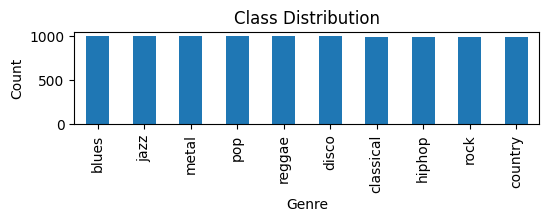

In [99]:
plt.figure(figsize=(6,1.2))
df['label'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

Each class has exactly the same number of datapoints.

## Data Visualization

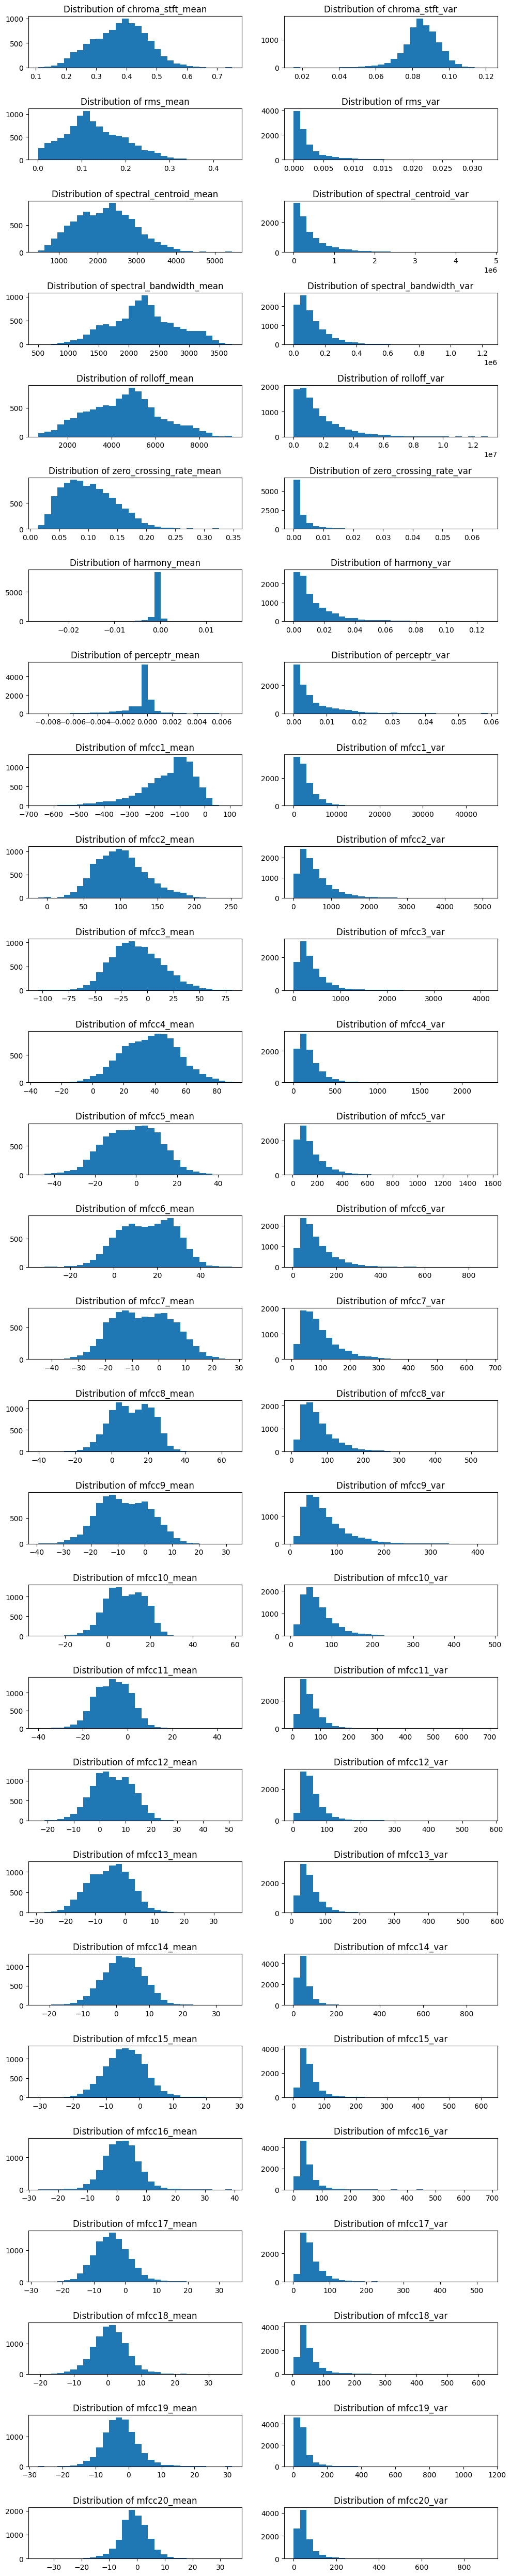

In [100]:
# Grouped histograms for each feature mean and variance
mean_cols = [col for col in df.columns if 'mean' in col]
var_cols = [col for col in df.columns if 'var' in col]

fig, axs = plt.subplots(len(mean_cols), 2, figsize=(10, 50))

for i, col in enumerate(mean_cols):
    axs[i, 0].hist(df[col], bins=30)
    axs[i, 0].set_title(f'Distribution of {col}')

for i, col in enumerate(var_cols):
    axs[i, 1].hist(df[col], bins=30)
    axs[i, 1].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

After the visualization of the dataframe, we can see that harmony and perceptr have very centralized mean. This indicates that they might not be very impactful to our model, we decided to drop these two columns. 

In [101]:
drop_four = ["harmony_mean", "harmony_var", "perceptr_mean", "perceptr_var"]
df = df.drop(labels=drop_four, axis=1)
df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


## Correlation Analysis

* Plotting out the overall correlation matrix

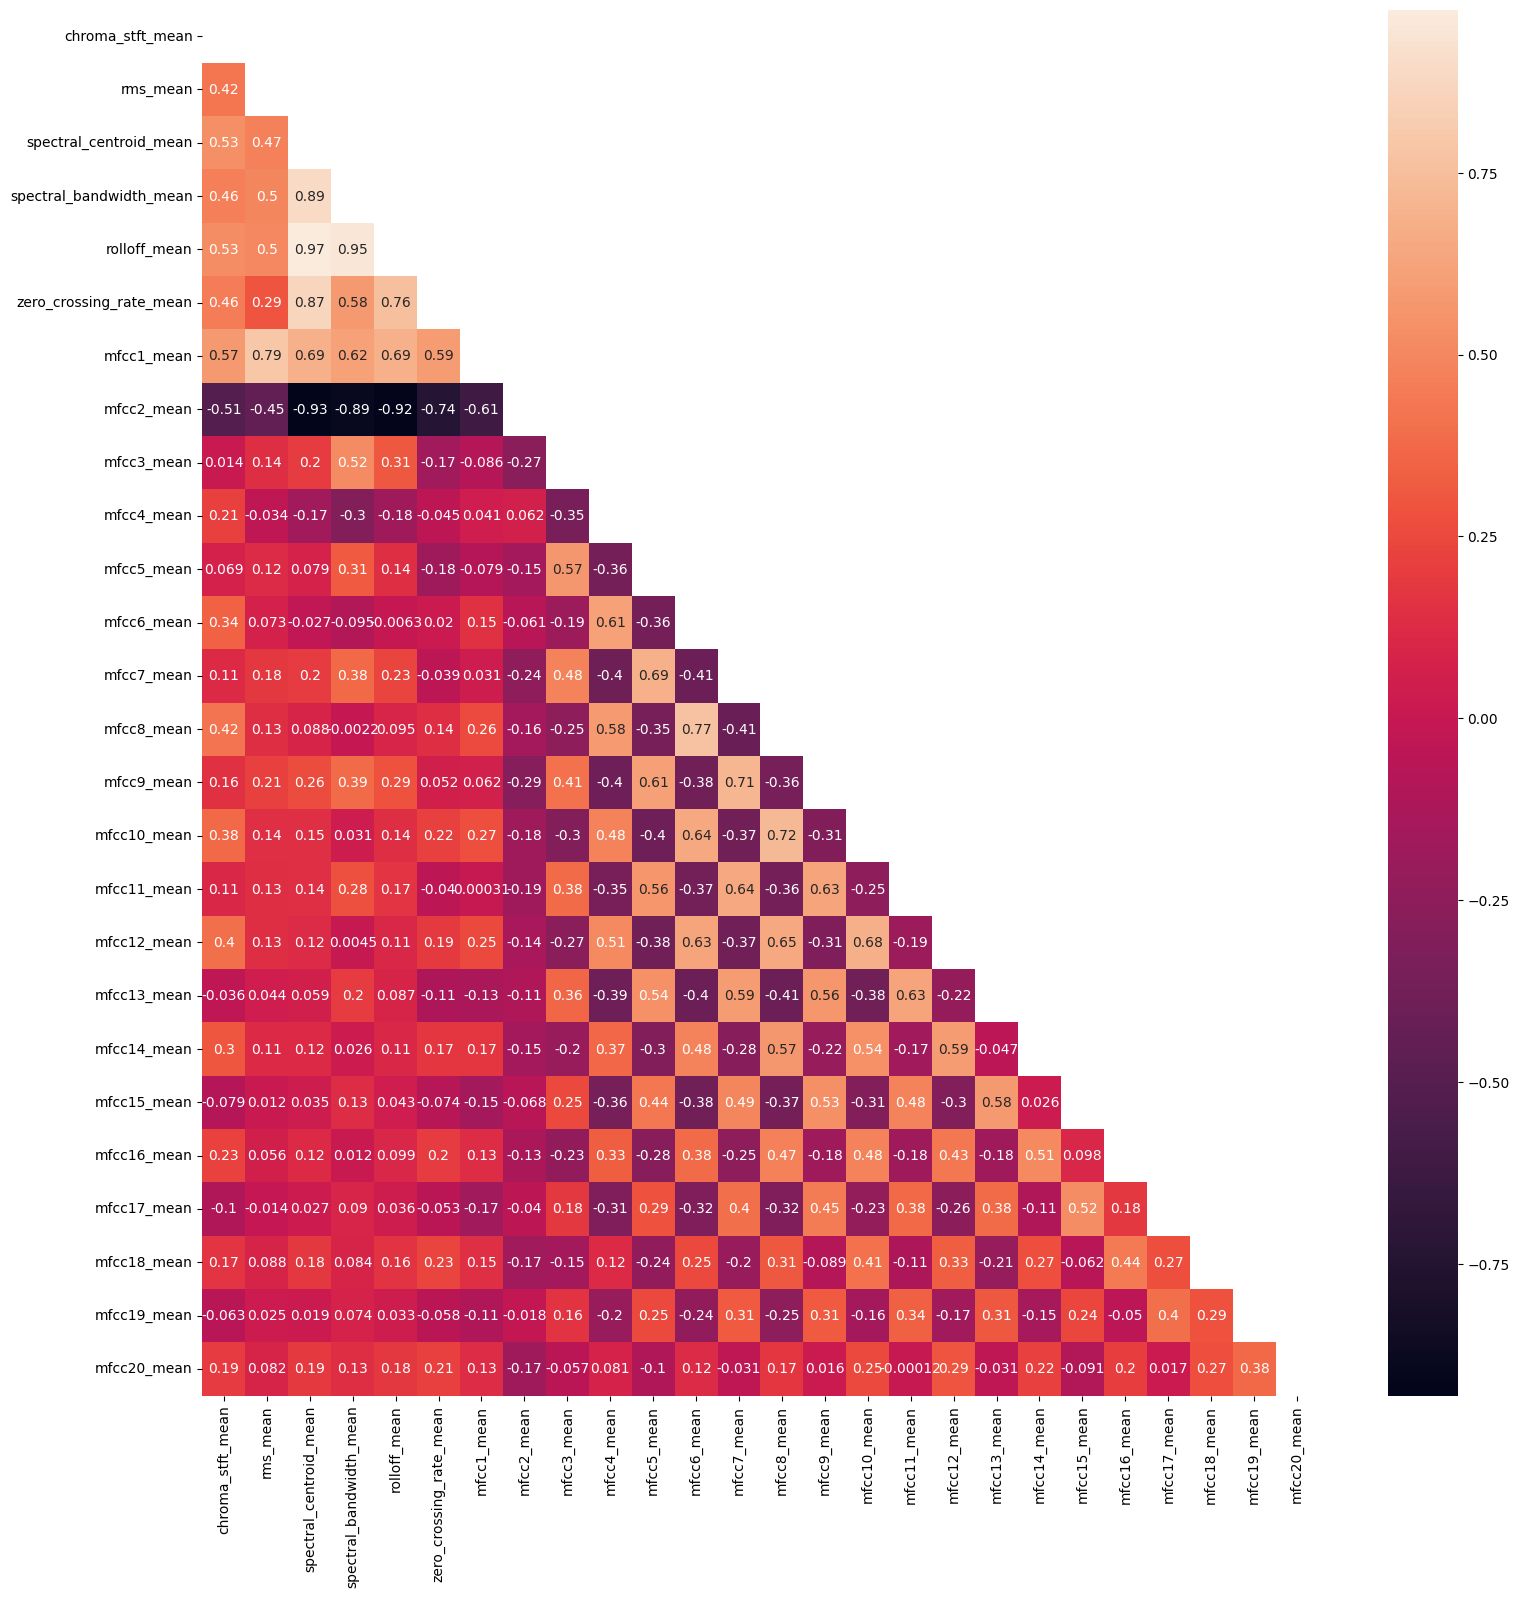

In [102]:
# Calculate correlation matrix
corr_matrix_means = df[[col for col in df.columns if 'mean' in col]].corr()
corr_matrix_vars = df[[col for col in df.columns if 'var' in col]].corr()

# Plot heatmap of correlation matrix
mask = np.triu(np.ones_like(corr_matrix_means, dtype=bool))
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix_means, mask=mask, annot=True)
plt.show()

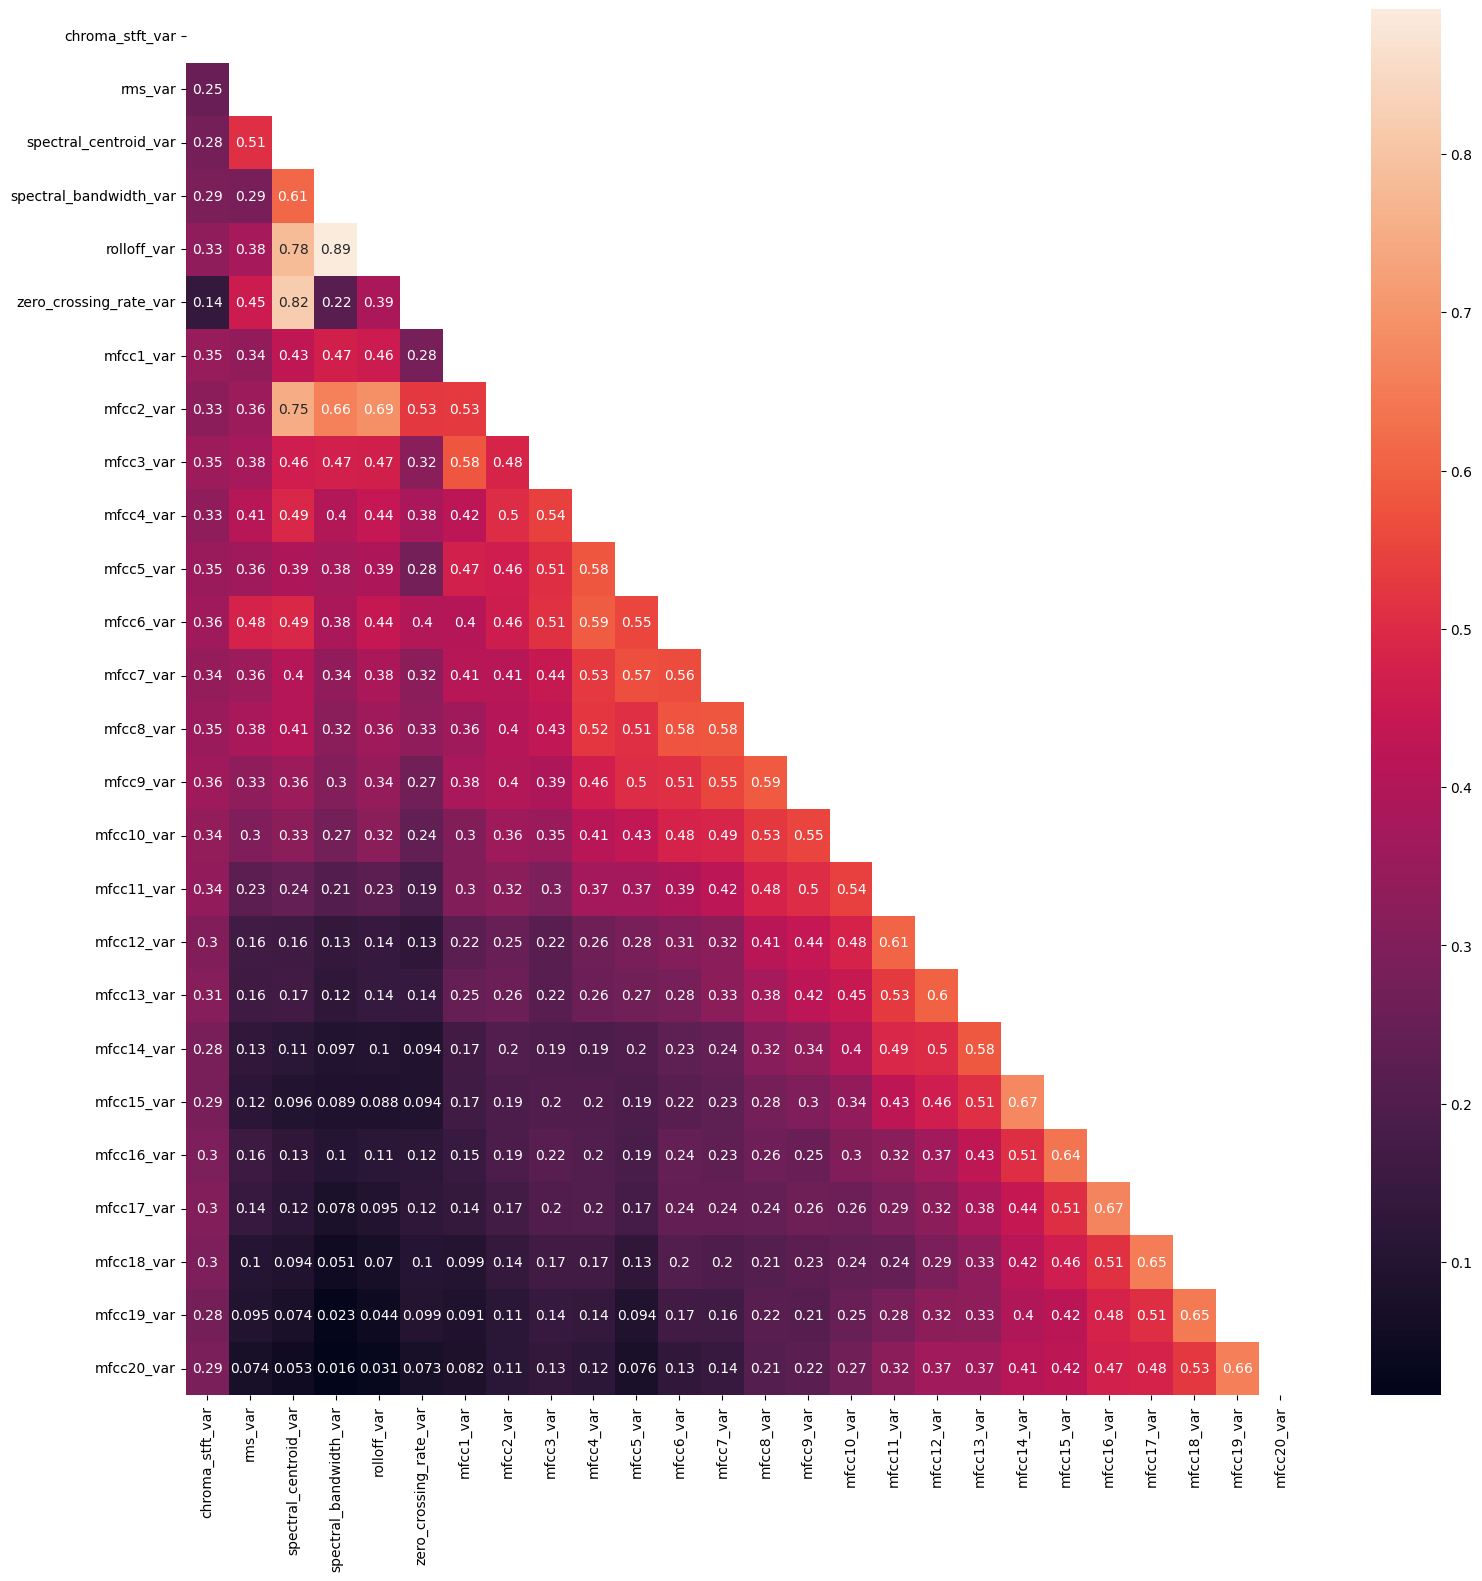

In [103]:
plt.figure(figsize=(18,18))
mask = np.triu(np.ones_like(corr_matrix_vars, dtype=bool))
sns.heatmap(corr_matrix_vars, mask=mask, annot=True)
plt.show()

##### Because Mel Frequency Cepstral Coefficients (MFCCs) got seperated into 20 parts in the raw dataset, while contributing to the same feature, we decided to draw two correlation matrices by seperating mfcc with other features for _mean_ and _var_ respectively.

In [104]:
# Prepare the partial dataframe with MFCCs
df_mfcc = df.filter(regex=r'(mfcc*|label)')

# Prepare the partial dataframe without MFCCs
df_partial = df.drop(labels=df.filter(regex=r'mfcc*').columns, axis=1)

df_mfcc.shape, df_partial.shape

((9990, 41), (9990, 14))

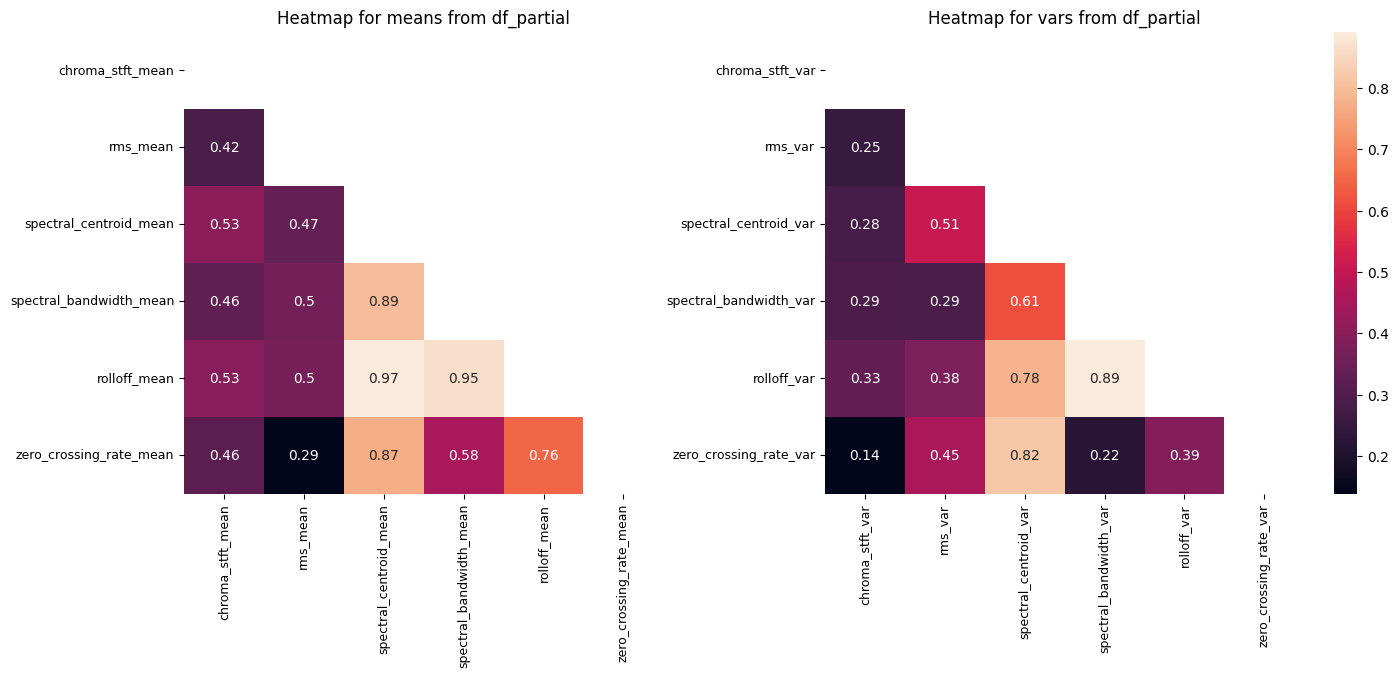

In [105]:
# Calculate correlation matrix
corr_matrix_means_partial = df_partial.filter(regex=r'_mean').corr()
corr_matrix_vars_partial = df_partial.filter(regex=r'_var').corr()


# Plot heatmap of correlation matrix
fig, axs = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [0.8, 1]})
fig = plt.gcf()
fig.set_size_inches(16, 6) 
plt.subplots_adjust(wspace=0.3)

# Plot the first heatmap on the left subplot
mask1 = np.triu(np.ones_like(corr_matrix_means_partial, dtype=bool))
fig1 = sns.heatmap(corr_matrix_means_partial, ax=axs[0], cbar=False, annot=True, annot_kws={"size": 10}, mask=mask1)
fig1.set_xticklabels(fig1.get_yticklabels(), fontsize=9)
fig1.set_yticklabels(fig1.get_yticklabels(), fontsize=9)
fig1.set_title('Heatmap for means from df_partial')

# Plot the second heatmap on the right subplot
mask2 = np.triu(np.ones_like(corr_matrix_vars_partial, dtype=bool))
fig2 = sns.heatmap(corr_matrix_vars_partial, ax=axs[1], cbar=True, annot=True, annot_kws={"size": 10}, mask=mask2)
fig2.set_xticklabels(fig2.get_yticklabels(), fontsize=9)
fig2.set_yticklabels(fig2.get_yticklabels(), fontsize=9) # rotation=-30
fig2.set_title('Heatmap for vars from df_partial')

# Show the figure
plt.show()

Based on the data we have, since spectral centroid and spectral bandwidth are related, it's not suprised to see their high correlation. But we also found the there's relatively high correlation in between `spectral centroid` & `zero crossing rate`, `rolloff` & `spectral centroid`, `rolloff` & `spectral bandwidth`, `rolloff` &  `zero crossing rate`, which are worth discovering more.

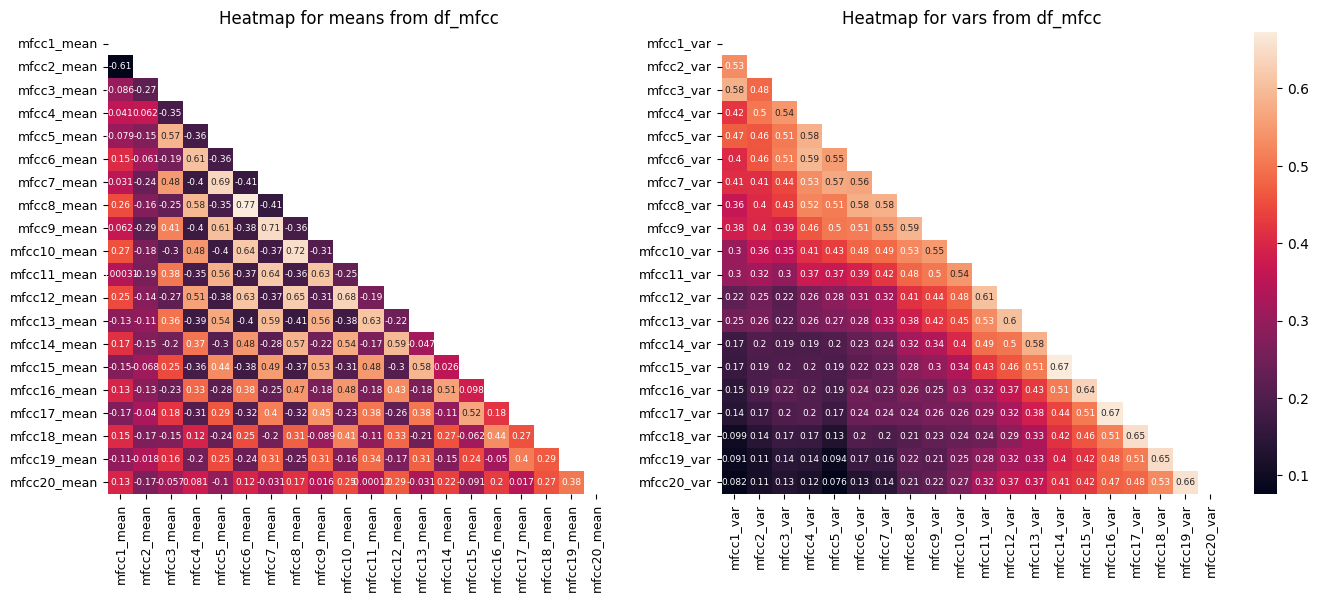

In [106]:
# Calculate correlation matrix
corr_matrix_means_mfcc = df_mfcc.filter(regex=r'_mean').corr()
corr_matrix_vars_mfcc = df_mfcc.filter(regex=r'_var').corr()


# Plot heatmap of correlation matrix
fig, axs = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [0.8, 1]})
fig = plt.gcf()
fig.set_size_inches(16, 6) 
plt.subplots_adjust(wspace=0.2)

# Plot the first heatmap on the left subplot
mask1 = np.triu(np.ones_like(corr_matrix_means_mfcc, dtype=bool))
fig1 = sns.heatmap(corr_matrix_means_mfcc, ax=axs[0], cbar=False, annot=True, annot_kws={"size": 6.5}, mask=mask1)
fig1.set_xticklabels(fig1.get_yticklabels(), fontsize=9)
fig1.set_yticklabels(fig1.get_yticklabels(), fontsize=9)
fig1.set_title('Heatmap for means from df_mfcc')

# Plot the second heatmap on the right subplot
mask2 = np.triu(np.ones_like(corr_matrix_vars_mfcc, dtype=bool))
fig2 = sns.heatmap(corr_matrix_vars_mfcc, ax=axs[1], cbar=True, annot=True, annot_kws={"size": 6.5}, mask=mask2)
fig2.set_xticklabels(fig2.get_yticklabels(), fontsize=9)
fig2.set_yticklabels(fig2.get_yticklabels(), fontsize=9) # rotation=-30
fig2.set_title('Heatmap for vars from df_mfcc')

# Show the figure
plt.show()

Could have more explaination of the pattern here.
Don't really know what mfcc is.

* Plotting out the correlation by label

In [107]:
def heatmap_label(df, label):
    
    """Draw the heatmap for the given label."""

    # Get all the data with the given label
    df = df[df['label'] == label]

    # Seperate original dataframe into two, one with MFCCs and one without
    df_mfcc = df.filter(regex=r'(mfcc*|label)')
    df_partial = df.drop(labels=df.filter(regex=r'mfcc*').columns, axis=1)

    # Correlation matrices for df_partial
    corr_matrix_means_partial = df_partial.filter(regex=r'_mean').corr()
    corr_matrix_vars_partial = df_partial.filter(regex=r'_var').corr()

    # Plot heatmap of df_partial
    fig, axs = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [0.8, 1]})
    fig.suptitle(f'Genre: {label.upper()}', fontsize=18, x=0.45)
    fig = plt.gcf()
    fig.set_size_inches(16, 6) 
    plt.subplots_adjust(wspace=0.3)
    mask1 = np.triu(np.ones_like(corr_matrix_means_partial, dtype=bool))
    fig1 = sns.heatmap(corr_matrix_means_partial, ax=axs[0], cbar=False, annot=True, annot_kws={"size": 10}, mask=mask1)
    fig1.set_xticklabels(fig1.get_yticklabels(), fontsize=9)
    fig1.set_yticklabels(fig1.get_yticklabels(), fontsize=9)
    fig1.set_title('df_partial means')
    mask2 = np.triu(np.ones_like(corr_matrix_vars_partial, dtype=bool))
    fig2 = sns.heatmap(corr_matrix_vars_partial, ax=axs[1], cbar=True, annot=True, annot_kws={"size": 10}, mask=mask2)
    fig2.set_xticklabels(fig2.get_yticklabels(), fontsize=9)
    fig2.set_yticklabels(fig2.get_yticklabels(), fontsize=9) # rotation=-30
    fig2.set_title('df_partial variances')
    plt.show()

    # Correlation matrices for df_mfcc
    corr_matrix_means_mfcc = df_mfcc.filter(regex=r'_mean').corr()
    corr_matrix_vars_mfcc = df_mfcc.filter(regex=r'_var').corr()


    # Plot heatmap of correlation matrix
    fig, axs = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [0.8, 1]})
    fig = plt.gcf()
    fig.set_size_inches(16, 6) 
    plt.subplots_adjust(wspace=0.2)
    mask1 = np.triu(np.ones_like(corr_matrix_means_mfcc, dtype=bool))
    fig1 = sns.heatmap(corr_matrix_means_mfcc, ax=axs[0], cbar=False, annot=True, annot_kws={"size": 6.5}, mask=mask1)
    fig1.set_xticklabels(fig1.get_yticklabels(), fontsize=9)
    fig1.set_yticklabels(fig1.get_yticklabels(), fontsize=9)
    fig1.set_title('df_mfcc means')
    mask2 = np.triu(np.ones_like(corr_matrix_vars_mfcc, dtype=bool))
    fig2 = sns.heatmap(corr_matrix_vars_mfcc, ax=axs[1], cbar=True, annot=True, annot_kws={"size": 6.5}, mask=mask2)
    fig2.set_xticklabels(fig2.get_yticklabels(), fontsize=9)
    fig2.set_yticklabels(fig2.get_yticklabels(), fontsize=9) # rotation=-30
    fig2.set_title('df_mfcc variances')
    plt.show()

In [108]:
df_label['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

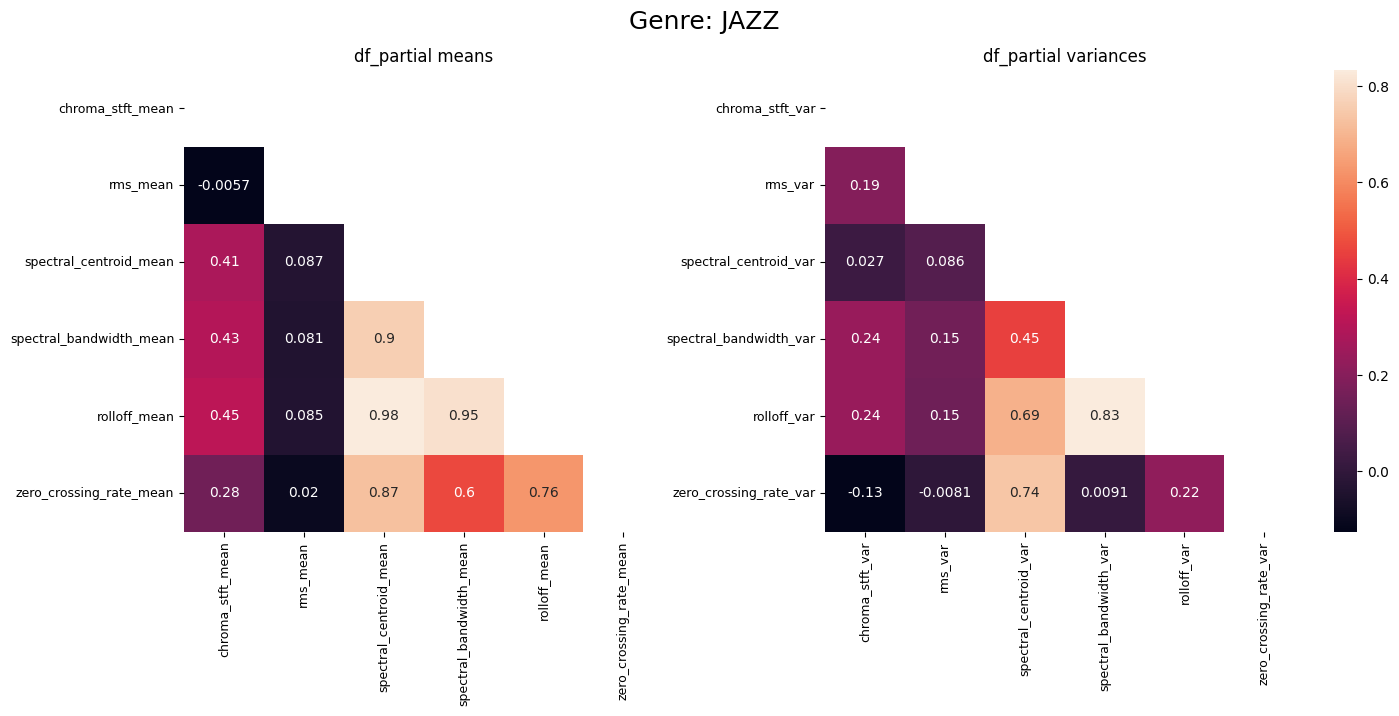

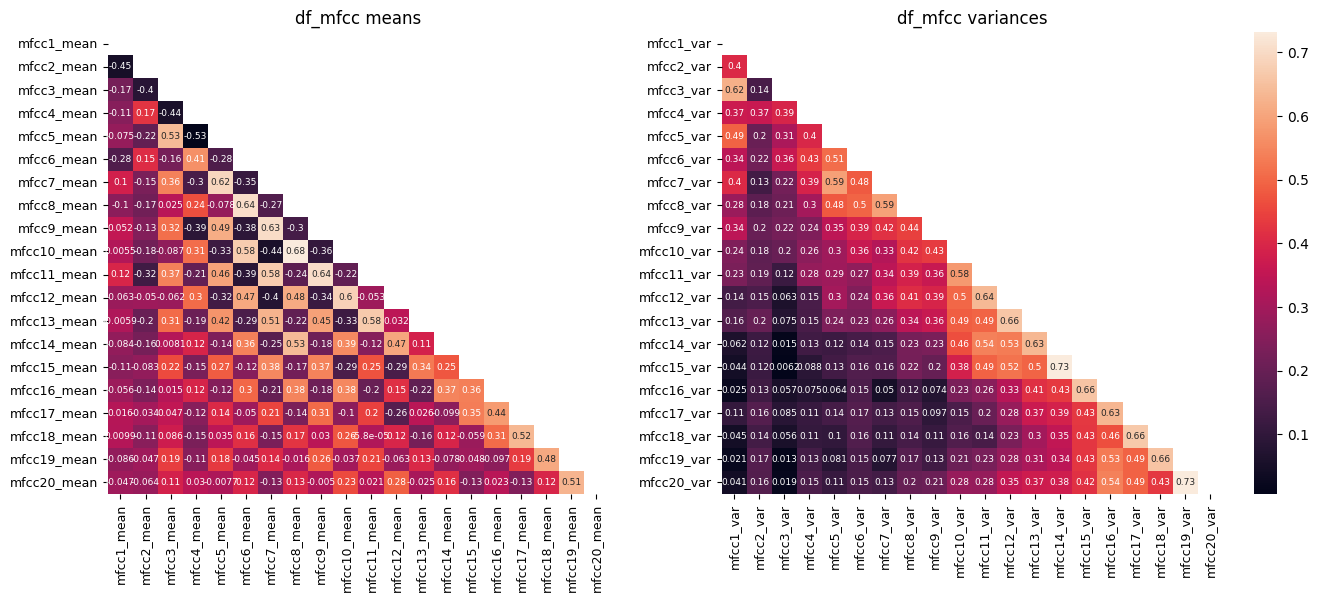

In [109]:
heatmap_label(df, 'jazz')

## Feature Distribution

* Feature distribution for the entire dataset

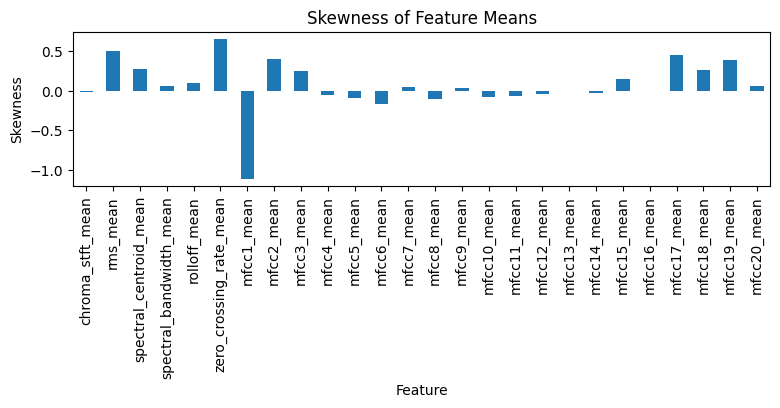

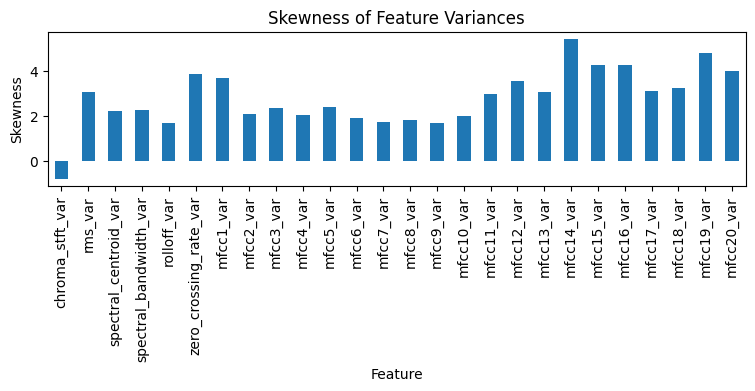

In [110]:
# Check skewness
skewness_means = df[[col for col in df.columns if 'mean' in col]].skew()
skewness_vars = df[[col for col in df.columns if 'var' in col]].skew()

# Bar plot for skewness
skewness_means.plot(kind='bar', figsize=(9,2))
plt.title('Skewness of Feature Means')
plt.xlabel('Feature')
plt.ylabel('Skewness')
plt.show()

skewness_vars.plot(kind='bar', figsize=(9,2))
plt.title('Skewness of Feature Variances')
plt.xlabel('Feature')
plt.ylabel('Skewness')
plt.show()

* Feature distribution by label

In [111]:
def compare_feature(df, feature, label_1, label_2):
    """
    Draw and comapre given labels' selected feature distribution.
    """
    label_1_df = df[df['label']==label_1][feature]
    label_2_df = df[df['label']==label_2][feature]
    bins = 30
    plt.figure(figsize=(9,5))
    plt.hist(label_1_df, alpha=0.5, label=label_1, bins=bins, color='lawngreen')
    plt.hist(label_2_df, alpha=0.5, label=label_2, bins=bins, color='blue')
    plt.legend(loc='upper right')
    plt.title(f"{label_1.upper()} and {label_2.upper()} {feature} distribution")
    plt.show()

In [112]:
df.columns

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var',
       'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean',
       'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var',
       'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean',
       'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var',
       'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean',
       'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var',
       'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean',
       'mfcc20_var', 'label'],
      dtype='object')

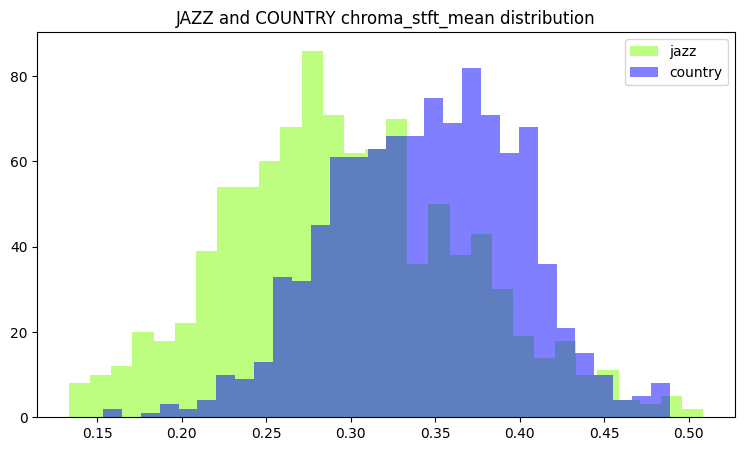

In [113]:
compare_feature(df, 'chroma_stft_mean', 'jazz', 'country')

## Dimensionality Reduction

In [114]:
df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [115]:
df_features = df_partial.drop(labels=df_partial.filter(regex=r'_var').columns, axis=1)
df_features = df_features.drop(labels=df_features.filter(regex=r'mfcc*').columns, axis=1)
df_features.head()

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,tempo,label
0,0.335406,0.130405,1773.065032,1972.744388,3714.560359,0.081851,129.199219,blues
1,0.343065,0.112699,1816.693777,2010.051501,3869.682242,0.087173,123.046875,blues
2,0.346815,0.132003,1788.539719,2084.565132,3997.639160,0.071383,123.046875,blues
3,0.363639,0.132565,1655.289045,1960.039988,3568.300218,0.069426,123.046875,blues
4,0.335579,0.143289,1630.656199,1948.503884,3469.992864,0.070095,123.046875,blues


In [116]:
mfcc_means = df_mfcc.filter(regex=r'(_mean|label)')
mfcc_means.head()

,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,mfcc10_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,label
0,-118.627914,125.083626,-23.443724,41.321484,-5.976108,20.115141,-16.045410,17.855198,-14.633434,10.270527,...,10.183875,-4.681614,8.417439,-7.233477,-2.853603,-3.241280,0.722209,-5.050335,-0.243027,blues
1,-125.590706,122.421227,-20.718019,50.128387,-11.333302,21.385401,-15.960796,19.454103,-12.465918,17.898169,...,8.145000,-7.717751,8.397150,-8.300493,4.074709,-6.055294,0.159015,-2.837699,5.784063,blues
2,-132.441940,115.085175,-14.811666,50.189293,-0.680819,24.650375,-13.506104,15.643386,-13.216637,10.406025,...,11.853963,-4.677677,6.571110,-2.424750,4.806280,-1.768610,2.378768,-1.938424,2.517375,blues
3,-118.231087,132.116501,-18.758335,39.769306,-13.260426,20.468134,-14.563448,18.745104,-13.755463,12.993759,...,10.389314,-4.362739,9.156193,-9.889441,-1.359111,-3.841155,1.218588,-3.580352,3.630866,blues
4,-105.968376,134.643646,-19.961748,40.171753,-14.271939,18.734617,-15.619381,19.207966,-18.274683,14.316693,...,17.045437,-5.681399,5.705521,-7.986080,2.092937,0.664582,1.689446,-3.392489,0.536961,blues


### t-Distributed Stochastic Neighbor Embedding (tSNE)

In [117]:
tsne = TSNE(n_components=2, random_state=42)

df_features_X = df_features.drop(columns='label')
mfcc_means_X = mfcc_means.drop(columns='label')

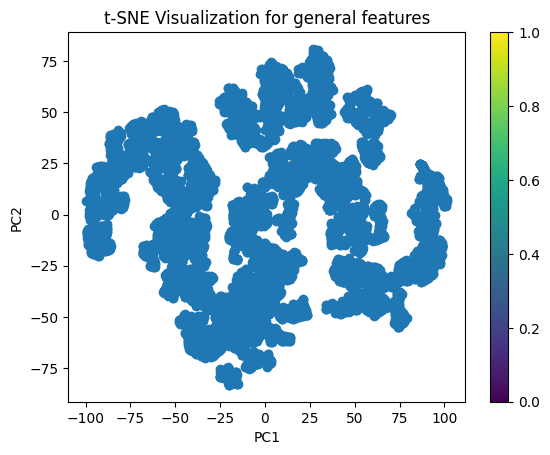

In [118]:
features_tsne = tsne.fit_transform(df_features_X)

plt.scatter(features_tsne[:, 0], features_tsne[:, 1])
plt.colorbar()

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('t-SNE Visualization for general features')

plt.show()

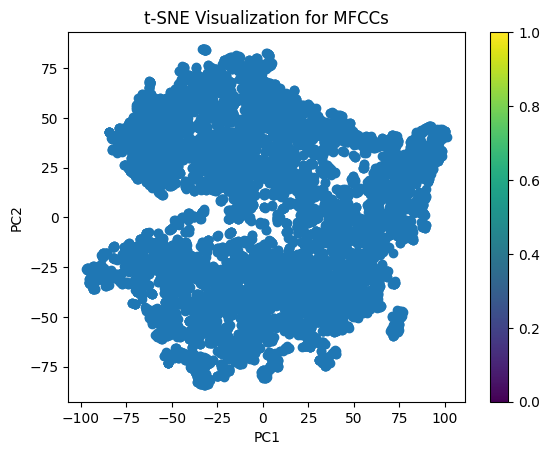

In [119]:
mfcc_tsne = tsne.fit_transform(mfcc_means_X)

plt.scatter(mfcc_tsne[:, 0], mfcc_tsne[:, 1])
plt.colorbar()

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('t-SNE Visualization for MFCCs')

plt.show()

### Principal Component Analysis (PCA)

In [120]:
pca = PCA(n_components=2)
pca.fit(df_features_X)

X_pca = pca.transform(df_features_X)

explained_var = pca.explained_variance_ratio_
components = pca.components_

for i, (pc1, pc2) in enumerate(zip(components[0], components[1])):
    print(f"PC{i+1}:")
    for selected_feature, component in zip(df_features_X.columns, [pc1, pc2]):
        print(f"{selected_feature}: {component}")
    print()

PC1:
chroma_stft_mean: 2.5472343776365223e-05
rms_mean: 5.1443773184811743e-05

PC2:
chroma_stft_mean: 1.8268491282081126e-05
rms_mean: -2.7220616716079064e-05

PC3:
chroma_stft_mean: 0.3932166279294757
rms_mean: 0.6709516844938734

PC4:
chroma_stft_mean: 0.276741535316699
rms_mean: -0.7383820456181397

PC5:
chroma_stft_mean: 0.8768094376059005
rms_mean: -0.06784592279506842

PC6:
chroma_stft_mean: 1.863603110869982e-05
rms_mean: 0.00012822365416466225

PC7:
chroma_stft_mean: 0.00012225250124726128
rms_mean: -0.0035640868342365416



In [121]:
print("Transformed Data:")
print(X_pca)
print("\nExplained Variance Ratio:")
print(explained_var)
print("\nPrincipal Components:")
print(components)

Transformed Data:
[[ -988.53222047   -29.81236614]
 [ -825.04066662   -38.5889469 ]
 [ -703.29645971  -121.17984422]
 ...
 [-2385.58447282    73.47913212]
 [ -328.4891177    104.87154982]
 [-1293.62950057   -28.37332455]]

Explained Variance Ratio:
[0.98465023 0.01207904]

Principal Components:
[[ 2.54723438e-05  1.82684913e-05  3.93216628e-01  2.76741535e-01
   8.76809438e-01  1.86360311e-05  1.22252501e-04]
 [ 5.14437732e-05 -2.72206167e-05  6.70951684e-01 -7.38382046e-01
  -6.78459228e-02  1.28223654e-04 -3.56408683e-03]]


In [122]:
pca = PCA(n_components=2)
pca.fit(mfcc_means_X)

mfccX_pca = pca.transform(mfcc_means_X)

explained_var_mfcc = pca.explained_variance_ratio_
mfcc_components = pca.components_

for i, (pc1, pc2) in enumerate(zip(mfcc_components[0], mfcc_components[1])):
    print(f"PC{i+1}:")
    for selected_feature, component in zip(mfcc_means_X.columns, [pc1, pc2]):
        print(f"{selected_feature}: {component}")
    print()

PC1:
mfcc1_mean: -0.9767964554570698
mfcc2_mean: -0.09272412395907735

PC2:
mfcc1_mean: 0.20751395325250915
mfcc2_mean: -0.558204293569644

PC3:
mfcc1_mean: 0.015675146541443183
mfcc2_mean: 0.5794976364148502

PC4:
mfcc1_mean: -0.006988342459389211
mfcc2_mean: -0.2858049803963571

PC5:
mfcc1_mean: 0.009012440681308225
mfcc2_mean: 0.27315878399782073

PC6:
mfcc1_mean: -0.018558816517491406
mfcc2_mean: -0.15918144734416192

PC7:
mfcc1_mean: -0.004006812258063184
mfcc2_mean: 0.22080258919545656

PC8:
mfcc1_mean: -0.027061585414876344
mfcc2_mean: -0.13796458676114265

PC9:
mfcc1_mean: -0.00621991326608321
mfcc2_mean: 0.17537182574714258

PC10:
mfcc1_mean: -0.022614347671485745
mfcc2_mean: -0.10405941330680787

PC11:
mfcc1_mean: -0.0005339575499068755
mfcc2_mean: 0.12843840815418528

PC12:
mfcc1_mean: -0.017653110231824656
mfcc2_mean: -0.08766209025376155

PC13:
mfcc1_mean: 0.007897852751978008
mfcc2_mean: 0.11496074625237752

PC14:
mfcc1_mean: -0.010216451282701655
mfcc2_mean: -0.047469332

In [123]:
print("Transformed Data:")
print(mfccX_pca)
print("\nExplained Variance Ratio:")
print(explained_var_mfcc)
print("\nPrincipal Components:")
print(mfcc_components)

Transformed Data:
[[-21.84154369 -32.62291055]
 [-16.00848984 -34.59836587]
 [-10.38134324 -21.0838663 ]
 ...
 [145.21476878  -8.73660246]
 [ 16.19593476 -38.01334944]
 [ 92.67213926 -23.7793679 ]]

Explained Variance Ratio:
[0.81301072 0.07957108]

Principal Components:
[[-9.76796455e-01  2.07513953e-01  1.56751465e-02 -6.98834246e-03
   9.01244068e-03 -1.85588165e-02 -4.00681226e-03 -2.70615854e-02
  -6.21991327e-03 -2.26143477e-02 -5.33957550e-04 -1.76531102e-02
   7.89785275e-03 -1.02164513e-02  7.96128803e-03 -7.38557816e-03
   8.31212118e-03 -7.32268107e-03  4.84316944e-03 -6.72275010e-03]
 [-9.27241240e-02 -5.58204294e-01  5.79497636e-01 -2.85804980e-01
   2.73158784e-01 -1.59181447e-01  2.20802589e-01 -1.37964587e-01
   1.75371826e-01 -1.04059413e-01  1.28438408e-01 -8.76620903e-02
   1.14960746e-01 -4.74693323e-02  7.76414792e-02 -4.19675057e-02
   5.95290210e-02 -2.00578102e-02  3.98455936e-02 -2.92618327e-03]]


# --------------------------------------------------------------------------

## Joint Plot Visualization

With our previous visualization and analysis, we can infer some information:

Based on the data we have, since spectral centroid and spectral bandwidth are related, it's not suprised to see their high correlation. But we also found the there's relatively high correlation in between  `rolloff` & `spectral centroid`, `rolloff` & `spectral bandwidth`, `rolloff` &  `zero crossing rate`, which are worth discovering more.


Moving forward, we generated several joint plots for visualization with labeled genres:

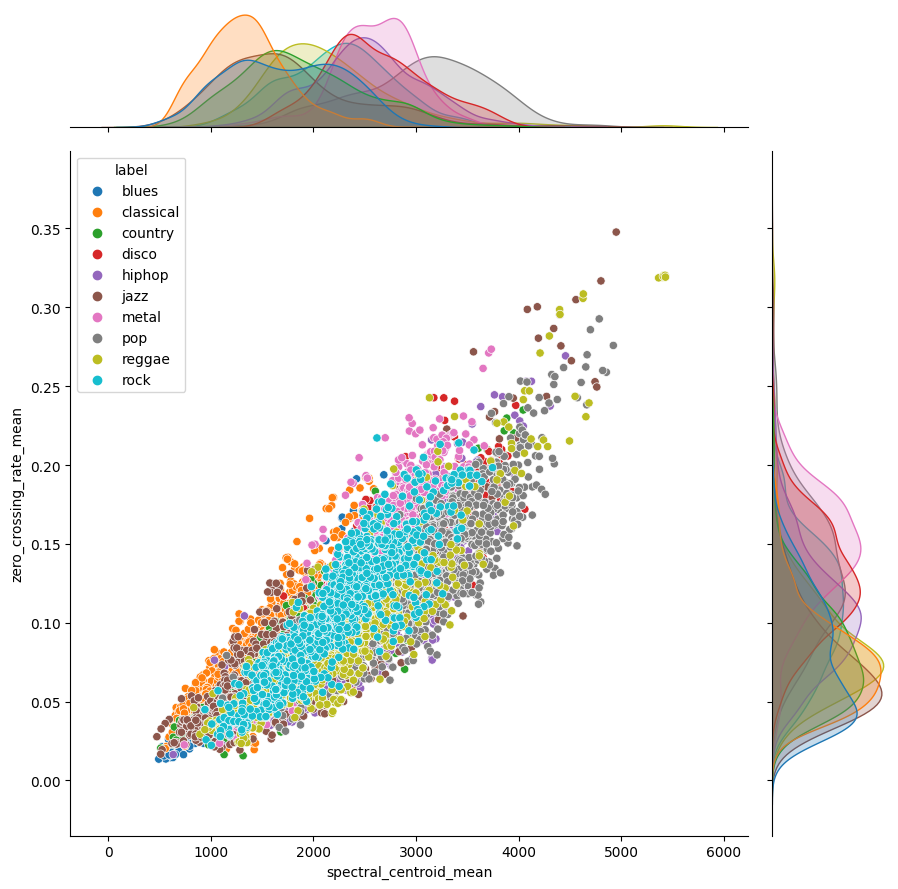

In [124]:
sns.jointplot(data=df_partial, x=df['spectral_centroid_mean'], y=df['zero_crossing_rate_mean'], 
              hue='label', kind='scatter', height=9)
plt.show()

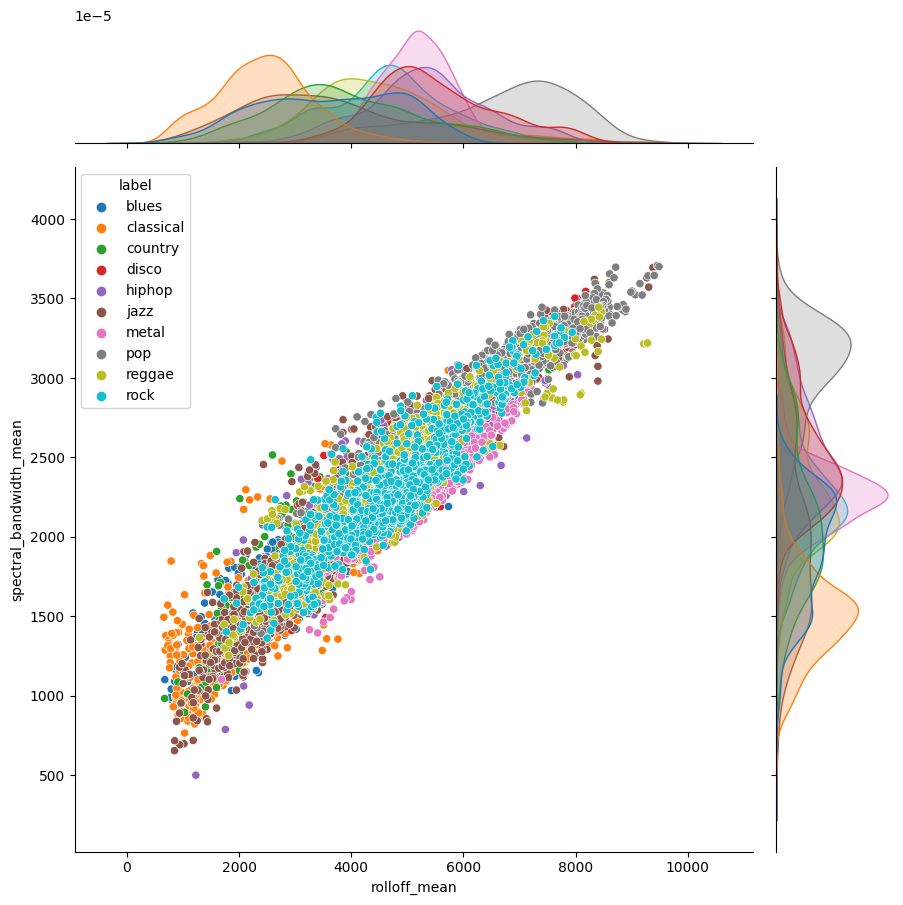

In [125]:
sns.jointplot(data=df_partial, x=df['rolloff_mean'], y=df['spectral_bandwidth_mean'], 
              hue='label', kind='scatter', height=9)
plt.show()

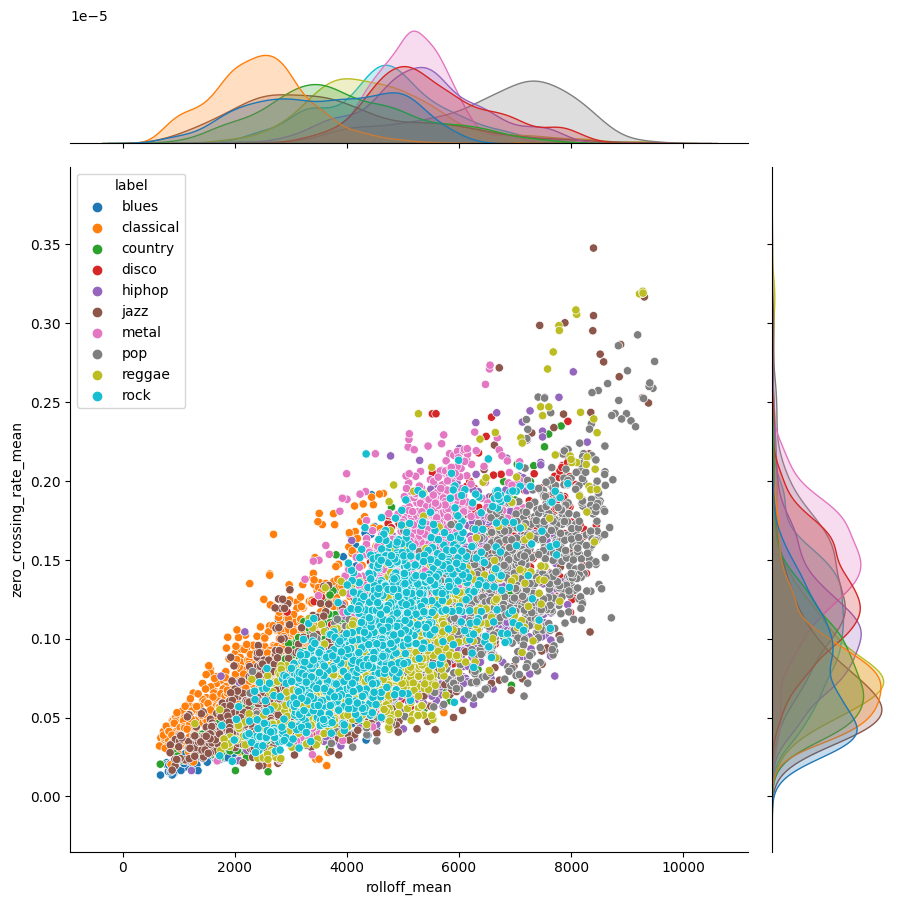

In [126]:
sns.jointplot(data=df_partial, x=df['rolloff_mean'], y=df['zero_crossing_rate_mean'], 
              hue='label', kind='scatter', height=9)
plt.show()

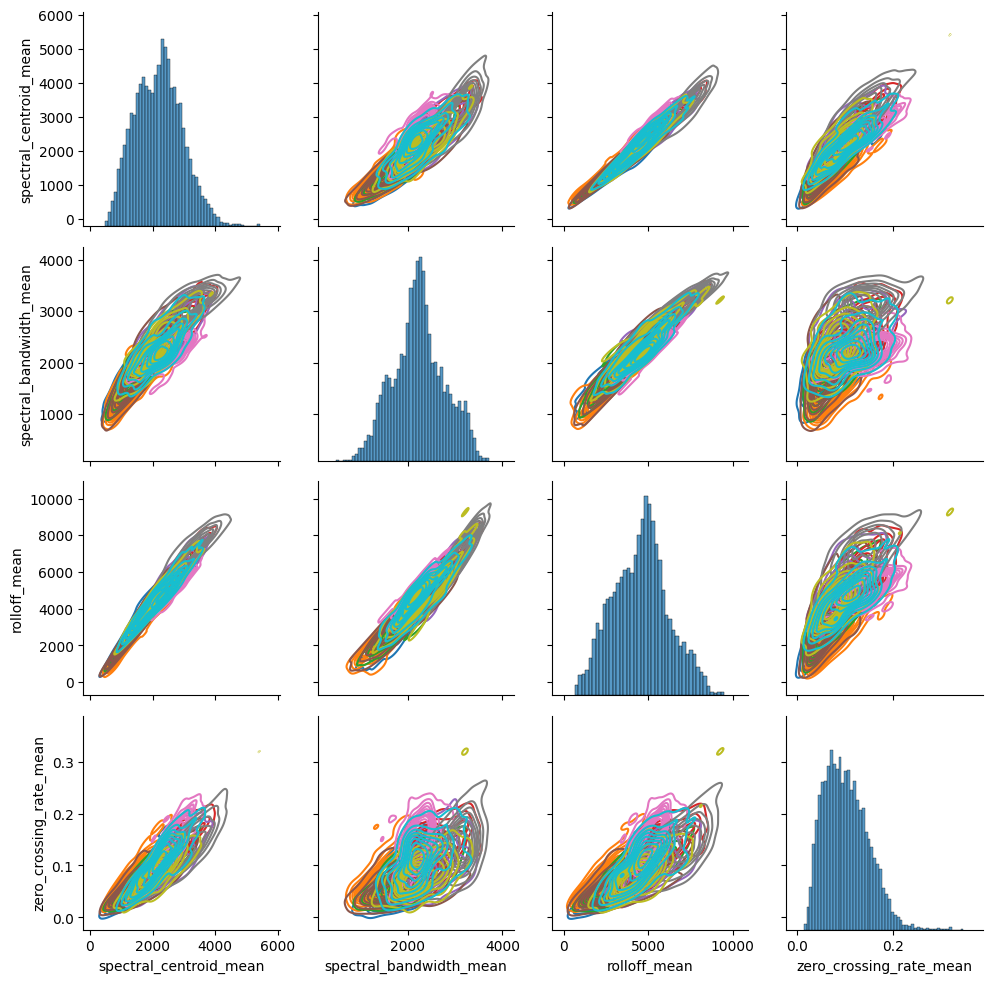

In [127]:
variables = ["spectral_centroid_mean", "spectral_bandwidth_mean", "rolloff_mean", "zero_crossing_rate_mean"]
graph = sns.PairGrid(df_raw, hue='label', vars=variables)
graph.map_diag(sns.histplot, hue=None)
graph.map_offdiag(sns.kdeplot)
plt.show()

### MFCC resources
https://librosa.org/doc/main/generated/librosa.feature.mfcc.html



# --------------------------------------------------------------------------

# Models

Split data into train and test sets

In [129]:
data = df.drop('label', axis=1)
label_in_str = df['label']

# Encode target strings with values from 0 to n_classes - 1
le = preprocessing.LabelEncoder()
label = le.fit_transform(label_in_str)

# Standardize feature values
scalar = preprocessing.StandardScaler()
scaled_data = scalar.fit_transform(data)

# Train test split
TEST_SIZE = 0.2
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(scaled_data, label, test_size=TEST_SIZE, shuffle=True, random_state=RANDOM_STATE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7992, 53), (1998, 53), (7992,), (1998,))

## Kth Nearest Neighbors

Grid Search to get the best param for knn

In [130]:
# Grid Search 
parameters = {"n_neighbors": range(1, 50), 'weights': ['uniform', 'distance']}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters, cv = 5)

gridsearch.fit(X_train, y_train)

best_param = gridsearch.best_params_
print(best_param)

best_k = best_param["n_neighbors"]
best_weights = best_param["weights"]

preds_grid = gridsearch.predict(X_test)
rmse_grid = sqrt(mean_squared_error(y_test, preds_grid))
print(rmse_grid)

bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)
bagging_model = BaggingRegressor(bagged_knn, n_estimators=50)
bagging_model.fit(X_train, y_train)
preds_bag = bagging_model.predict(X_test)
rmse_bag = sqrt(mean_squared_error(y_test, preds_bag))
print(rmse_bag)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Train Score', knn.score(X_train, y_train))
print('Test Score', knn.score(X_test, y_test))
accuracy = (y_pred==y_test).sum() / len(y_test)
print(f"Accuracy for this model is {accuracy*100:.1f}%")

{'n_neighbors': 3, 'weights': 'distance'}
1.3662821821138516
1.3288799317732043
Train Score 0.9077827827827828
Test Score 0.8573573573573574
Accuracy for this model is 85.7%


In [131]:
# Set up StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Grid search
parameters = {"n_neighbors": range(1, 50), 
              'weights': ['uniform', 'distance'], 
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=strat_k_fold, scoring='accuracy')

gridsearch.fit(X_train, y_train)

best_param = gridsearch.best_params_
print("Best parameters: ", best_param)

best_k = best_param["n_neighbors"]
best_weights = best_param["weights"]
best_algorithm = best_param["algorithm"]
best_p = best_param["p"]

# KNN model with best parameters
knn_best = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights, algorithm=best_algorithm, p=best_p)

# Use cross_val_score for model evaluation
cv_scores_train = cross_val_score(knn_best, X_train, y_train, cv=strat_k_fold, scoring='accuracy')
cv_scores_test = cross_val_score(knn_best, X_test, y_test, cv=strat_k_fold, scoring='accuracy')

print('Cross-validation Training Score: ', cv_scores_train.mean())
print('Cross-validation Testing Score: ', cv_scores_test.mean())

# BaggingClassifier with KNeighborsClassifier as base estimator
bagged_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights, algorithm=best_algorithm, p=best_p)
bagging_model = BaggingClassifier(bagged_knn, n_estimators=50, random_state=RANDOM_STATE)

bagging_model.fit(X_train, y_train)

y_pred_bag = bagging_model.predict(X_test)

accuracy_bag = accuracy_score(y_test, y_pred_bag)
print("Bagging Model Accuracy: ", accuracy_bag)

In [73]:
# Use SMOTE for class balancing
smote = SMOTE(random_state=RANDOM_STATE)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Set up StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Grid search
parameters = {"n_neighbors": range(1, 50), 
              'weights': ['uniform', 'distance'], 
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

gridsearch = GridSearchCV(KNeighborsClassifier(), parameters, cv=strat_k_fold, scoring='accuracy')

gridsearch.fit(X_train_scaled, y_smote)

best_param = gridsearch.best_params_
print("Best parameters: ", best_param)

best_k = best_param["n_neighbors"]
best_weights = best_param["weights"]
best_algorithm = best_param["algorithm"]
best_p = best_param["p"]

# KNN model with best parameters
knn_best = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights, algorithm=best_algorithm, p=best_p)

# Use cross_val_score for model evaluation
cv_scores_train = cross_val_score(knn_best, X_train_scaled, y_smote, cv=strat_k_fold, scoring='accuracy')
cv_scores_test = cross_val_score(knn_best, X_test_scaled, y_test, cv=strat_k_fold, scoring='accuracy')

print('Cross-validation Training Score: ', cv_scores_train.mean())
print('Cross-validation Testing Score: ', cv_scores_test.mean())

# BaggingClassifier with KNeighborsClassifier as base estimator
bagged_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights, algorithm=best_algorithm, p=best_p)
bagging_model = BaggingClassifier(bagged_knn, n_estimators=50, random_state=RANDOM_STATE)

bagging_model.fit(X_train_scaled, y_smote)

y_pred_bag = bagging_model.predict(X_test_scaled)

accuracy_bag = accuracy_score(y_test, y_pred_bag)
print("Bagging Model Accuracy: ", accuracy_bag)

Best parameters:  {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Cross-validation Training Score:  0.7195402298850575
Cross-validation Testing Score:  0.525
Bagging Model Accuracy:  0.66


## SVM

In [64]:
svm = SVC(random_state=RANDOM_STATE)

svm_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel types
}

svm_search = GridSearchCV(
    svm, 
    param_grid=svm_grid, 
    cv=StratifiedKFold(n_splits=5),  # maintain distribution of classes across folds
    verbose=1, 
    n_jobs=-1  # use all processors
)

svm_search.fit(X_train, y_train)

print(f'Best parameters for SVM: {svm_search.best_params_}')

y_pred_svm = svm_search.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'Accuracy for SVM: {accuracy_svm*100:.1f}%')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy for SVM: 69.5%


In [69]:
RANDOM_STATE = 42

# Standardizition
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],  # Regularization parameter
    'gamma': [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'degree': [2, 3, 4]  # Degree for 'poly' kernel
}

svm = SVC(random_state=RANDOM_STATE)

svm_search = GridSearchCV(
    svm, 
    param_grid=svm_grid, 
    cv=StratifiedKFold(n_splits=5),  # maintain distribution of classes across folds
    verbose=1, 
    n_jobs=-1  # use all processors
)

svm_search.fit(X_train_scaled, y_train)

print(f'Best parameters for SVM: {svm_search.best_params_}')

y_pred_svm = svm_search.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy for SVM: {accuracy_svm*100:.1f}%')

# BaggingClassifier with SVC as base estimator
best_svm = SVC(C=svm_search.best_params_['C'], gamma=svm_search.best_params_['gamma'], kernel=svm_search.best_params_['kernel'])
bagging_svm = BaggingClassifier(best_svm, n_estimators=10, random_state=RANDOM_STATE)

bagging_svm.fit(X_train_scaled, y_train)

y_pred_bagging_svm = bagging_svm.predict(X_test_scaled)
accuracy_bagging_svm = accuracy_score(y_test, y_pred_bagging_svm)
print(f'Bagging SVM Accuracy: {accuracy_bagging_svm*100:.1f}%')

# Handling class imbalance with SMOTE
# smote = SMOTE()
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Train the final model
best_svm.fit(X_train_scaled, y_train)
y_pred_final = best_svm.predict(X_test_scaled)
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f'Final SVM Accuracy: {accuracy_final*100:.1f}%')

Fitting 5 folds for each of 588 candidates, totalling 2940 fits
Best parameters for SVM: {'C': 100, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy for SVM: 70.5%
Bagging SVM Accuracy: 70.5%
Final SVM Accuracy: 70.5%


## RNN


In [74]:
data = df.drop(['label', 'tempo'], axis=1)
label_in_str = df['label']

# Encode target strings with values from 0 to n_classes - 1
le = preprocessing.LabelEncoder()
label = le.fit_transform(label_in_str)

# Standardize feature values
scalar = preprocessing.StandardScaler()
scaled_data = scalar.fit_transform(data)

# Train test split
TEST_SIZE = 0.2
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(scaled_data, label, test_size=TEST_SIZE, shuffle=True, random_state=RANDOM_STATE)
X_train = np.reshape(X_train, (800, 26, 2))
X_test = np.reshape(X_test, (200, 26, 2))
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 26, 2), (200, 26, 2), (800,), (200,))

In [75]:
# Turn numpy array into pytorch tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create train and test datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Put dataset into dataloader
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [76]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, device):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.num_layers = num_layers
        self.device = device

        self.rnn = nn.RNN(input_size=input_size,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True)
        self.fc = nn.Linear(in_features=hidden_size*26,
                            out_features=output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.rnn(x, h0)
        out = out.reshape(out.shape[0], -1)
        out = self.fc(out)
        return out

In [85]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
NUM_EPOCH = 100
LEARNING_RATE = 0.01

In [86]:
rnn_model = RNN(2, 16, 3, 10, device).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=LEARNING_RATE)

In [87]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

for epoch in tqdm(range(NUM_EPOCH)):
    rnn_model.train()
    train_loss = 0
    train_acc = 0

    for X, y in train_loader:
        X = X.to(device)
        y = y.to(device)

        y_pred = rnn_model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred = torch.softmax(y_pred, dim=1).argmax(dim=1)
        train_acc += (y==y_pred).sum() / len(y)

    train_loss = train_loss / len(train_loader)
    train_acc = train_acc * 100 / len(train_loader)

    rnn_model.eval()
    with torch.inference_mode():
        test_loss = 0
        test_acc = 0

        for X, y in test_loader:
            X = X.to(device)
            y = y.to(device)

            y_pred = rnn_model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss
            y_pred = torch.softmax(y_pred, dim=1).argmax(dim=1)
            test_acc += (y==y_pred).sum() / len(y)

        test_loss = test_loss / len(test_loader)
        test_acc = test_loss * 100 / len(test_loader)

    print(f'Epoch:{epoch} | Train loss:{train_loss:.2f} | Train acc:{train_acc:.2f}% | Test loss:{test_loss:.2f} | Test acc:{test_acc:.2f}%')

  6%|▌         | 6/100 [00:00<00:03, 24.57it/s]

Epoch:0 | Train loss:2.11 | Train acc:24.90% | Test loss:2.21 | Test acc:221.04%
Epoch:1 | Train loss:1.77 | Train acc:38.18% | Test loss:1.68 | Test acc:168.33%
Epoch:2 | Train loss:1.41 | Train acc:49.80% | Test loss:1.51 | Test acc:150.53%
Epoch:3 | Train loss:1.26 | Train acc:51.76% | Test loss:1.28 | Test acc:127.87%
Epoch:4 | Train loss:1.02 | Train acc:65.23% | Test loss:1.27 | Test acc:127.42%
Epoch:5 | Train loss:0.94 | Train acc:68.46% | Test loss:1.25 | Test acc:124.61%
Epoch:6 | Train loss:0.81 | Train acc:73.73% | Test loss:1.22 | Test acc:121.65%


 14%|█▍        | 14/100 [00:00<00:02, 28.73it/s]

Epoch:7 | Train loss:0.87 | Train acc:69.73% | Test loss:1.18 | Test acc:117.51%
Epoch:8 | Train loss:0.75 | Train acc:76.27% | Test loss:1.18 | Test acc:117.67%
Epoch:9 | Train loss:0.66 | Train acc:77.05% | Test loss:1.09 | Test acc:109.47%
Epoch:10 | Train loss:0.68 | Train acc:75.59% | Test loss:1.14 | Test acc:113.73%
Epoch:11 | Train loss:0.62 | Train acc:80.47% | Test loss:1.16 | Test acc:116.28%
Epoch:12 | Train loss:0.72 | Train acc:73.73% | Test loss:1.16 | Test acc:115.50%
Epoch:13 | Train loss:0.65 | Train acc:77.64% | Test loss:1.16 | Test acc:116.25%


 20%|██        | 20/100 [00:00<00:02, 29.26it/s]

Epoch:14 | Train loss:0.60 | Train acc:78.91% | Test loss:1.11 | Test acc:110.95%
Epoch:15 | Train loss:0.53 | Train acc:81.15% | Test loss:1.12 | Test acc:112.15%
Epoch:16 | Train loss:0.53 | Train acc:81.64% | Test loss:1.20 | Test acc:119.81%
Epoch:17 | Train loss:0.46 | Train acc:83.59% | Test loss:1.13 | Test acc:112.85%
Epoch:18 | Train loss:0.46 | Train acc:84.77% | Test loss:1.10 | Test acc:110.14%
Epoch:19 | Train loss:0.41 | Train acc:86.91% | Test loss:1.10 | Test acc:110.22%


 26%|██▌       | 26/100 [00:00<00:02, 27.33it/s]

Epoch:20 | Train loss:0.44 | Train acc:85.94% | Test loss:1.13 | Test acc:112.77%
Epoch:21 | Train loss:0.37 | Train acc:88.96% | Test loss:1.14 | Test acc:114.35%
Epoch:22 | Train loss:0.42 | Train acc:85.06% | Test loss:1.19 | Test acc:118.81%
Epoch:23 | Train loss:0.41 | Train acc:87.70% | Test loss:1.23 | Test acc:123.47%
Epoch:24 | Train loss:0.36 | Train acc:88.48% | Test loss:1.26 | Test acc:125.67%
Epoch:25 | Train loss:0.34 | Train acc:88.87% | Test loss:1.17 | Test acc:116.75%


 32%|███▏      | 32/100 [00:01<00:02, 28.51it/s]

Epoch:26 | Train loss:0.36 | Train acc:87.99% | Test loss:1.20 | Test acc:120.35%
Epoch:27 | Train loss:0.34 | Train acc:87.21% | Test loss:1.26 | Test acc:126.29%
Epoch:28 | Train loss:0.38 | Train acc:85.55% | Test loss:1.36 | Test acc:136.31%
Epoch:29 | Train loss:0.35 | Train acc:88.57% | Test loss:1.41 | Test acc:141.27%
Epoch:30 | Train loss:0.33 | Train acc:87.60% | Test loss:1.32 | Test acc:131.55%
Epoch:31 | Train loss:0.27 | Train acc:90.14% | Test loss:1.30 | Test acc:130.36%
Epoch:32 | Train loss:0.33 | Train acc:89.36% | Test loss:1.29 | Test acc:128.61%


 39%|███▉      | 39/100 [00:01<00:02, 29.50it/s]

Epoch:33 | Train loss:0.25 | Train acc:93.16% | Test loss:1.40 | Test acc:139.65%
Epoch:34 | Train loss:0.24 | Train acc:92.58% | Test loss:1.50 | Test acc:150.10%
Epoch:35 | Train loss:0.23 | Train acc:92.48% | Test loss:1.40 | Test acc:139.95%
Epoch:36 | Train loss:0.18 | Train acc:96.09% | Test loss:1.39 | Test acc:138.84%
Epoch:37 | Train loss:0.17 | Train acc:96.09% | Test loss:1.42 | Test acc:141.74%
Epoch:38 | Train loss:0.21 | Train acc:95.21% | Test loss:1.45 | Test acc:145.48%


 46%|████▌     | 46/100 [00:01<00:01, 28.89it/s]

Epoch:39 | Train loss:0.15 | Train acc:95.90% | Test loss:1.43 | Test acc:143.34%
Epoch:40 | Train loss:0.17 | Train acc:95.41% | Test loss:1.45 | Test acc:145.01%
Epoch:41 | Train loss:0.16 | Train acc:96.19% | Test loss:1.50 | Test acc:149.64%
Epoch:42 | Train loss:0.14 | Train acc:96.39% | Test loss:1.54 | Test acc:154.26%
Epoch:43 | Train loss:0.13 | Train acc:95.80% | Test loss:1.50 | Test acc:149.95%
Epoch:44 | Train loss:0.17 | Train acc:95.70% | Test loss:1.56 | Test acc:155.56%
Epoch:45 | Train loss:0.14 | Train acc:97.46% | Test loss:1.58 | Test acc:158.08%


 50%|█████     | 50/100 [00:01<00:01, 29.48it/s]

Epoch:46 | Train loss:0.12 | Train acc:96.97% | Test loss:1.57 | Test acc:156.51%
Epoch:47 | Train loss:0.12 | Train acc:98.05% | Test loss:1.58 | Test acc:157.73%
Epoch:48 | Train loss:0.09 | Train acc:98.54% | Test loss:1.62 | Test acc:162.18%
Epoch:49 | Train loss:0.11 | Train acc:97.95% | Test loss:1.64 | Test acc:164.18%
Epoch:50 | Train loss:0.11 | Train acc:98.44% | Test loss:1.62 | Test acc:162.46%
Epoch:51 | Train loss:0.10 | Train acc:98.44% | Test loss:1.65 | Test acc:164.99%
Epoch:52 | Train loss:0.09 | Train acc:99.22% | Test loss:1.60 | Test acc:160.06%


 58%|█████▊    | 58/100 [00:02<00:01, 30.07it/s]

Epoch:53 | Train loss:0.09 | Train acc:99.02% | Test loss:1.62 | Test acc:161.76%
Epoch:54 | Train loss:0.07 | Train acc:99.41% | Test loss:1.74 | Test acc:173.55%
Epoch:55 | Train loss:0.08 | Train acc:99.51% | Test loss:1.75 | Test acc:174.65%
Epoch:56 | Train loss:0.06 | Train acc:99.51% | Test loss:1.72 | Test acc:172.14%
Epoch:57 | Train loss:0.06 | Train acc:99.61% | Test loss:1.75 | Test acc:174.71%
Epoch:58 | Train loss:0.07 | Train acc:99.61% | Test loss:1.69 | Test acc:168.94%
Epoch:59 | Train loss:0.04 | Train acc:99.90% | Test loss:1.77 | Test acc:177.46%


 66%|██████▌   | 66/100 [00:02<00:01, 30.25it/s]

Epoch:60 | Train loss:0.05 | Train acc:99.61% | Test loss:1.85 | Test acc:184.98%
Epoch:61 | Train loss:0.04 | Train acc:99.90% | Test loss:1.79 | Test acc:178.91%
Epoch:62 | Train loss:0.04 | Train acc:99.90% | Test loss:1.74 | Test acc:174.17%
Epoch:63 | Train loss:0.05 | Train acc:99.80% | Test loss:1.74 | Test acc:173.65%
Epoch:64 | Train loss:0.04 | Train acc:99.80% | Test loss:1.79 | Test acc:178.60%
Epoch:65 | Train loss:0.04 | Train acc:99.90% | Test loss:1.82 | Test acc:182.22%
Epoch:66 | Train loss:0.03 | Train acc:99.90% | Test loss:1.81 | Test acc:181.12%


 74%|███████▍  | 74/100 [00:02<00:00, 30.50it/s]

Epoch:67 | Train loss:0.04 | Train acc:99.22% | Test loss:1.80 | Test acc:180.35%
Epoch:68 | Train loss:0.04 | Train acc:99.80% | Test loss:1.81 | Test acc:180.63%
Epoch:69 | Train loss:0.03 | Train acc:99.90% | Test loss:1.78 | Test acc:178.01%
Epoch:70 | Train loss:0.03 | Train acc:99.90% | Test loss:1.85 | Test acc:185.07%
Epoch:71 | Train loss:0.03 | Train acc:99.90% | Test loss:1.89 | Test acc:189.01%
Epoch:72 | Train loss:0.03 | Train acc:99.90% | Test loss:1.84 | Test acc:184.34%
Epoch:73 | Train loss:0.02 | Train acc:99.90% | Test loss:1.81 | Test acc:180.90%


 78%|███████▊  | 78/100 [00:02<00:00, 30.68it/s]

Epoch:74 | Train loss:0.02 | Train acc:99.90% | Test loss:1.81 | Test acc:181.25%
Epoch:75 | Train loss:0.02 | Train acc:99.80% | Test loss:1.84 | Test acc:184.06%
Epoch:76 | Train loss:0.02 | Train acc:99.90% | Test loss:1.87 | Test acc:186.57%
Epoch:77 | Train loss:0.02 | Train acc:99.90% | Test loss:1.87 | Test acc:187.26%
Epoch:78 | Train loss:0.02 | Train acc:99.90% | Test loss:1.87 | Test acc:186.86%
Epoch:79 | Train loss:0.02 | Train acc:99.90% | Test loss:1.84 | Test acc:184.18%
Epoch:80 | Train loss:0.03 | Train acc:99.22% | Test loss:1.86 | Test acc:185.86%


 86%|████████▌ | 86/100 [00:02<00:00, 30.69it/s]

Epoch:81 | Train loss:0.02 | Train acc:99.90% | Test loss:1.90 | Test acc:190.00%
Epoch:82 | Train loss:0.02 | Train acc:99.90% | Test loss:1.89 | Test acc:189.00%
Epoch:83 | Train loss:0.02 | Train acc:99.90% | Test loss:1.88 | Test acc:187.61%
Epoch:84 | Train loss:0.01 | Train acc:99.90% | Test loss:1.88 | Test acc:187.74%
Epoch:85 | Train loss:0.01 | Train acc:99.90% | Test loss:1.90 | Test acc:190.07%
Epoch:86 | Train loss:0.01 | Train acc:99.90% | Test loss:1.91 | Test acc:190.70%
Epoch:87 | Train loss:0.01 | Train acc:99.90% | Test loss:1.90 | Test acc:190.31%


 94%|█████████▍| 94/100 [00:03<00:00, 30.61it/s]

Epoch:88 | Train loss:0.01 | Train acc:99.90% | Test loss:1.91 | Test acc:190.81%
Epoch:89 | Train loss:0.02 | Train acc:99.22% | Test loss:1.96 | Test acc:196.23%
Epoch:90 | Train loss:0.03 | Train acc:99.12% | Test loss:2.02 | Test acc:202.18%
Epoch:91 | Train loss:0.02 | Train acc:99.90% | Test loss:1.92 | Test acc:192.45%
Epoch:92 | Train loss:0.02 | Train acc:99.80% | Test loss:1.94 | Test acc:194.36%
Epoch:93 | Train loss:0.02 | Train acc:99.90% | Test loss:2.01 | Test acc:200.84%
Epoch:94 | Train loss:0.01 | Train acc:99.90% | Test loss:1.98 | Test acc:198.17%


100%|██████████| 100/100 [00:03<00:00, 29.28it/s]

Epoch:95 | Train loss:0.01 | Train acc:99.80% | Test loss:1.97 | Test acc:196.66%
Epoch:96 | Train loss:0.01 | Train acc:99.80% | Test loss:1.98 | Test acc:197.73%
Epoch:97 | Train loss:0.01 | Train acc:99.90% | Test loss:1.97 | Test acc:196.56%
Epoch:98 | Train loss:0.01 | Train acc:99.80% | Test loss:1.98 | Test acc:198.02%
Epoch:99 | Train loss:0.01 | Train acc:99.90% | Test loss:2.01 | Test acc:200.63%


## CNN

In [88]:
# Create a CNN model
class CNN(nn.Module):
    def __init__(self, output_size, device):
        super(CNN, self).__init__()
        self.output_size = output_size
        self.device = device

        self.layer_1 = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )

        self.layer_2 = nn.Sequential(
            nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )

        self.layer_3 = nn.Sequential(
            nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )

        self.flatten = nn.Flatten()

        self.fc_1 = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(128*7, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
        )

        self.fc_2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
        )

        self.fc_3 = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
        )

        self.fc_4 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
        )

        self.fc_5 = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, output_size),
        )

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        x = self.flatten(x)
        x = self.fc_1(x)
        x = self.fc_2(x)
        x = self.fc_3(x)
        x = self.fc_4(x)
        x = self.fc_5(x)
        return nn.functional.softmax(x, dim=1)

In [89]:
# Turn numpy array into pytorch tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create train and test datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Put dataset into dataloader
BATCH_SIZE = 256
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [90]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
NUM_EPOCH = 500
LEARNING_RATE = 0.0001
print(device)

cpu


In [91]:
model = CNN(output_size=10, device=device).to(device)
# Use sparse_softmax_cross_entropy
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [92]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

for epoch in tqdm(range(NUM_EPOCH)):
    for i, (X, y) in enumerate(train_loader):
        X = X.to(device)
        y = y.to(device)
        y_pred = model(X)
        l = loss(y_pred, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Loss: {l.item():.4f}')

    with torch.no_grad():
        correct = 0
        total = 0
        for X, y in test_loader:
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)
            _, predicted = torch.max(y_pred.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
        if epoch % 10 == 0:
            print(f'Accuracy of the network on the {total} test images: {100 * correct / total}%')

y_pred = []
y_true = []
with torch.no_grad():
    for X, y in test_loader:
        X = X.to(device)
        y = y.to(device)
        y_pred.extend(torch.argmax(model(X), 1).tolist())
        y_true.extend(y.tolist())

cf_matrix = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred))

  0%|          | 0/500 [00:00<?, ?it/s]


RuntimeError: Expected 2D (unbatched) or 3D (batched) input to conv1d, but got input of size: [256, 1, 26, 2]

# Proposed Solution
In general, the solution will be the following in steps:
1. Data Processing: We will begin by pre-processing our dataset. This involves handling missing data, dealing with outliers, and possibly transforming variables as necessary to make them appropraite to use.
2. Feature Selection: We will choose chroma_stft, rms, spectral_centroid, spectral_bandwidth, roll_off, zero_crossing_rate, harmony, perceptr, tempo, mfcc(1-20) to determine the genre of songs. Since we can't get those data in every frame or seconds, so we just get their mean and variance for future usage.
3. Model Training: We will utilize KNN, SVM, and Neural Networks (if possible) to train our models, adjusting parameters to find the most optimal configuration for each model.
4. Model Evaluation and Selection: We will evaluate each model's performance using various evaluation metrics such as accuracy, precision, recall, F1 score, and confusion matrix. The model that performs the best across all metrics will be selected as our final model.
5. Testing on Unseen Data: Finally, we will test our selected model on unseen data to assess its ability to generalize and make accurate predictions on new data to ensure that it doesn't overfit.

Then, to be specific, we will talk about them in details:
1. For algorithm of multi-class classification, we will use K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Neural Networks (If possible). We believe these methods are particularly suitable for our task due to their ability to handle high-dimensional data and flexibility in model complexity.
2. The machine learning algorithms will be trained on a comprehensive dataset comprising multiple music genre samples, where each song is represented by an array of extracted audio features. The aim is to create a model that, given these features of a song, can predict its genre with high accuracy.
3. For the library we may wanna use, we plan to implement our solution using Python and relevant libraries such as Pandas for data preprocessing, Scikit-learn for machine learning algorithms, and Matplotlib for data visualization.
4. For benchmark comparison, we will use a simple classification model, like Logistic Regression. The performance of our machine learning models will be used to be against this benchmark model to assess their efficiency and accuracy.

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

Since this is a classification problem, we will use the following metrics to evaluate both our benchmark model and solution model:
- Accuracy (mathematical representation: (TP + TN) / (TP + TN + FP + FN))
- Precision (mathematical representation: TP / (TP + FP))
- Recall (mathematical representation: TP / (TP + FN))
- F1 Score (mathematical representation: 2 * (Precision * Recall) / (Precision + Recall))
- Confusion Matrix (mathematical representation: [[TP, FP], [FN, TN]])

If applicable (if using deep learning model), we may also try to use the cross entropy loss function to evaluate our model and see how our model improves its performance for each learning iteration.

The mathematical representation of cross entropy loss function is as follows: 
$ -\sum_{i=1}^{n} y_i \log(p_i) $

where $y_i$ is the true label and $p_i$ is the predicted probability of the label.



# Ethics & Privacy

The dataset we get is a free dataset named GTZAN, the MNIST of sounds, from Kaggle which should not give any privacy concern since many music genre recognition ML models are trained on this dataset. However, if in future we are going to train a larger model based on more data, copy right may be one of the issue related to privacy.

As music creation develops, the boundries between genres get vague. More and more music have mixed styles and new genres will be created. While it makes the classification harder, classifying songs into specific genres may raise social issues at this time. Many song writeer may not be happy with their songs being classified into a specific genre. Labeling the dataset may become a harder work in the future.

If a powerful MGR model is developed and used in recommendation system of music, it may cause people to have a music taste bias as the system can always find the music that fit users current taste, thus reduces the chance for user to find new types music that they may like.

# Team Expectations 

* *Weekly meetings on Sundays on general progress check*
* *Bi-weekly quick meetings on Wednesdays before each check-point submission*
* *Frequent discussion through online platforms (comments inside notebook, text, zoom meetings, etc.)*

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting (all or assigned in the previous meeting)  | Discuss at Meeting (all or team member) |
|---|---|---|---|
| 5/14  |  7 PM |  Determine best form of communication; Brainstorm topics/questions  |  Decide on final project topic (all); discuss ideal datasets and ethics (all); do background research (Xiaoxuan) | 
| 5/16  |  10 PM | Do background research on topic | Draft project proposal (Xiaoxuan, Jiayi) | 
| 5/17  |  6 PM  | Draft project proposal (all) | Edit, finalize, and submit proposal (all) | 
| 5/19  |  10 PM | Search for extra datasets (Xiaoxuan) | Assign group members to lead each specific part (Xiaoxuan)   |
| 5/25  |  4 PM  | Discuss Wrangling and possible analytical approaches | EDA (Yunxiang, Xiaoxuan) |
| 5/28  | 6 PM  | Import & Wrangle Data , EDA (Xiaoxuan) | Review/Edit wrangling/EDA; Discuss Analysis Plan (all)  |
| 5/31  | 7 PM  | Finalize wrangling/EDA (Xiaoxuan, Jiayi) | Checkpoint submission |
| 6/2  | 7 PM  | Begin programming for project | Discuss/edit project code; Start training |
| TBD  | 12 PM  | Train models | Discuss/edit algorithms; Complete project |
| TBD  | 12 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 6/14  | Before 11:59 PM  | NA | Turn in Final Project  |

# Team Contribution

**Exploratory Data Analysis / Data Visualization:** Yunxiang Chi, Xiaoxuan Zhang, Jiayi Dong

**K- Nearest Neighbors:** Elaine Ge

**Support Vector Machine:** Yunxiang Chi

**Convolutional Neural Network:** Xiaoyan He, Xiaoxuan Zhang

**Evaluation Metrics:** Jiayi Dong

# Footnotes
<a name="gtzannote"></a>1.[^](#gtzan): GTZAN Dataset - Music Genre Classification. https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification<br> 

